In [24]:
import numpy as np
from scipy.misc import imread
from imgaug import augmenters
# import matplotlib.pyplot as plt
from glob import glob
import os
from PIL import Image

In [25]:
# Setup some augmenters
aug_dict = {}
aug_dict['Vertical_Flip'] = augmenters.Fliplr(1.0) # Vertical Flip
aug_dict['Horizontal_Flip'] = augmenters.Flipud(1.0) # Horizontal Flip
aug_dict['Blur'] = augmenters.GaussianBlur(5.0) # Blur image
aug_dict['Dropout'] = augmenters.Dropout(0.3, per_channel=True) # Zeros a pixel w/ p=0.3
aug_dict['Add-'] = augmenters.Add(-75, per_channel=True) # Makes it darker
aug_dict['Add+'] = augmenters.Add(75, per_channel=True) # Makes it lighter
aug_dict['Invert'] = augmenters.Invert(0.75, per_channel=True, deterministic=True)
aug_dict['AddGaussianNoise'] = augmenters.AdditiveGaussianNoise(scale=50, per_channel=True) # Adds noise
aug_dict['Emboss'] = augmenters.Emboss(alpha=1.0, strength=1.75)
# Def some affine augmentations too
aug_dict['Rotate+45'] = augmenters.Affine(rotate=45) # Rotates 45 degrees
aug_dict['Rotate-45'] = augmenters.Affine(rotate=-45) # Rotates -45 degrees
aug_dict['Rotate+90'] = augmenters.Affine(rotate=90) # Rotates 90 degrees
aug_dict['Rotate-90'] = augmenters.Affine(rotate=-90) # Rotates -90 degrees
aug_dict['Scale_in'] = augmenters.Affine(scale={"x": 1.5, "y": 1.5}) # Zooms in
aug_dict['Scale_out'] = augmenters.Affine(scale={"x": 0.5, "y": 0.5}) # Zooms out
aug_dict['Translate'] = augmenters.Affine(translate_px={"x": 150, "y": 150})

In [26]:
CLASSIFIER_DATA_DIR = '/a/data/fisheries_monitoring/data/classifiers/superbox/'
CLASSES = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [8]:
def applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write) :
    for class_i in CLASSES : # for each class
        print '  Class ' + class_i + ' for ' + param_name
        if not os.path.exists(dir_name + '/' + class_i) :
            print dir_name + '/' + class_i + ' does not exist'
            os.mkdir(dir_name + '/' + class_i)
        os.chdir(CLASSIFIER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            if os.path.exists(fname) and not over_write :
                continue
            img = np.array(imread(ff_img))
            aug_img = Image.fromarray(augmenter.augment_image(img))
            aug_img.save(fname)

In [6]:
# Add 90deg, 180deg, 270deg, rotate augmentation
over_write = False
aug_name = 'rotate'
params = [(1,),(2,),(3,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    param_name = '_' + str(int(param[0]*90))
    for class_i in CLASSES : # for each class
        print '  Class ' + class_i + ' for ' + param_name
        if not os.path.exists(dir_name + '/' + class_i) :
            print dir_name + '/' + class_i + ' does not exist'
            os.mkdir(dir_name + '/' + class_i)
        os.chdir(CLASSIFIER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            
            img = np.array(imread(ff_img))
            h,w,_ = img.shape
            if not os.path.exists(fname) or over_write : # Rotate and save the images
                aug_img = Image.fromarray(np.rot90(img, param[0]))
                aug_img.save(fname)

  Class ALB for _90
  Class BET for _90
  Class DOL for _90
  Class LAG for _90
  Class NoF for _90
  Class OTHER for _90
  Class SHARK for _90
  Class YFT for _90
  Class ALB for _180
  Class BET for _180
  Class DOL for _180
  Class LAG for _180
  Class NoF for _180
  Class OTHER for _180
  Class SHARK for _180
  Class YFT for _180
  Class ALB for _270
  Class BET for _270
  Class DOL for _270
  Class LAG for _270
  Class NoF for _270
  Class OTHER for _270
  Class SHARK for _270
  Class YFT for _270


In [9]:
# Add Vertical Flip augmentation
over_write = True
aug_name = 'vflip'
params = [(1.0,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.Fliplr(param[0])
    param_name = '_' + str(int(param[0])) 
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _1
  Class BET for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/BET does not exist
  Class DOL for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/DOL does not exist
  Class LAG for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/LAG does not exist
  Class NoF for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/NoF does not exist
  Class OTHER for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/OTHER does not exist
  Class SHARK for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/SHARK does not exist
  Class YFT for _1
/a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip/YFT does not exist


In [10]:
# Add Blur augmentation
over_write = True
aug_name = 'blur'
params = [(2.0,), (5.0,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.GaussianBlur(param[0])
    param_name = '_' + str(int(param[0])) 
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/ALB does not exist
  Class BET for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/BET does not exist
  Class DOL for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/DOL does not exist
  Class LAG for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/LAG does not exist
  Class NoF for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/NoF does not exist
  Class OTHER for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/OTHER does not exist
  Class SHARK for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/SHARK does not exist
  Class YFT for _2
/a/data/fisheries_monitoring/data/classifiers/non-superbox/blur/YFT does not exist
  Class ALB for _5
  Class BET for _5
  Class DOL for _5
  Class LAG for _5
  Class NoF for _5
  Class OTHER for _5
  Class SHARK for _5
  Class YFT for _5


In [11]:
# Add Inversion augmentation
over_write = True
aug_name = 'invert'
params = [(0.15,), (0.75,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.Invert(param[0], per_channel=True, deterministic=True)
    param_name = '_' + str(int(param[0]*100))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/ALB does not exist
  Class BET for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/BET does not exist
  Class DOL for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/DOL does not exist
  Class LAG for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/LAG does not exist
  Class NoF for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/NoF does not exist
  Class OTHER for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/OTHER does not exist
  Class SHARK for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/SHARK does not exist
  Class YFT for _15
/a/data/fisheries_monitoring/data/classifiers/non-superbox/invert/YFT does not exist
  Class ALB for _75
  Class BET for _75
  Class DOL for _75
  Class LAG for _75
  Class NoF for _75
  Class OTHER for _75
  Class SHARK for _75
  Class 

In [13]:
# Add Gaussian Noise augmentation
over_write = True
aug_name = 'gaussianNoise'
params = [(30,), (51,), (80,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.AdditiveGaussianNoise(scale=param[0], per_channel=True)
    param_name = '_' + str(int(param[0]))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/ALB does not exist
  Class BET for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/BET does not exist
  Class DOL for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/DOL does not exist
  Class LAG for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/LAG does not exist
  Class NoF for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/NoF does not exist
  Class OTHER for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/OTHER does not exist
  Class SHARK for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/SHARK does not exist
  Class YFT for _30
/a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise/YFT does not exist
  Class ALB for _51
  Class BET for _51
  Class DOL for _51
  Class LAG for _51
  Class NoF for 

In [14]:
# Add Emboss augmentation
over_write = True
aug_name = 'emboss'
params = [(1.0,1.75)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.Emboss(alpha=param[0], strength=param[1])
    param_name = '_' + str(int(param[0])) + '_' + str(int(param[1]*100))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/ALB does not exist
  Class BET for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/BET does not exist
  Class DOL for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/DOL does not exist
  Class LAG for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/LAG does not exist
  Class NoF for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/NoF does not exist
  Class OTHER for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/OTHER does not exist
  Class SHARK for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/SHARK does not exist
  Class YFT for _1_175
/a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss/YFT does not exist


In [15]:
# Add addition augmentation
over_write = True
aug_name = 'add'
params = [(75,),(-75,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.Add(param[0], per_channel=True)
    param_name = '_' + str(int(param[0]))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/ALB does not exist
  Class BET for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/BET does not exist
  Class DOL for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/DOL does not exist
  Class LAG for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/LAG does not exist
  Class NoF for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/NoF does not exist
  Class OTHER for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/OTHER does not exist
  Class SHARK for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/SHARK does not exist
  Class YFT for _75
/a/data/fisheries_monitoring/data/classifiers/non-superbox/add/YFT does not exist
  Class ALB for _-75
  Class BET for _-75
  Class DOL for _-75
  Class LAG for _-75
  Class NoF for _-75
  Class OTHER for _-75
  Class SHARK for _-75
  Class YFT for _-75


In [27]:
# Add Dropout augmentation
over_write = True
aug_name = 'dropout'
params = [(20,), (45,)]
dir_name = CLASSIFIER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)

for param in params :
    augmenter = augmenters.Dropout(param[0]/float(100), per_channel=True)
    param_name = '_' + str(int(param[0])) 
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class ALB for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/ALB does not exist
  Class BET for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/BET does not exist
  Class DOL for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/DOL does not exist
  Class LAG for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/LAG does not exist
  Class NoF for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/NoF does not exist
  Class OTHER for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/OTHER does not exist
  Class SHARK for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/SHARK does not exist
  Class YFT for _20
/a/data/fisheries_monitoring/data/classifiers/superbox/dropout/YFT does not exist
  Class ALB for _45
  Class BET for _45
  Class DOL for _45
  Class LAG for _45
  Class NoF for _45
  Class OTHER for _45
  Class SHARK for _45
  Class YFT for _45


## Count number of files in each folder

In [17]:
aug_folders = glob(CLASSIFIER_DATA_DIR + '*')
for folder in aug_folders:
    file_names = glob(folder + "/*/*.jpg")
    print "Number of files in folder", folder, ":", len(file_names)

Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/invert : 9672
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/vflip : 4836
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/add : 9672
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/emboss : 4836
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/gaussianNoise : 14508
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/blur : 9672
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/original : 4836
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/dropout : 0
Number of files in folder /a/data/fisheries_monitoring/data/classifiers/non-superbox/rotate : 14508


## Visualize augmented data

/a/data/fisheries_monitoring/data/classifiers/superbox/rotate/YFT/img_02505_90.jpg


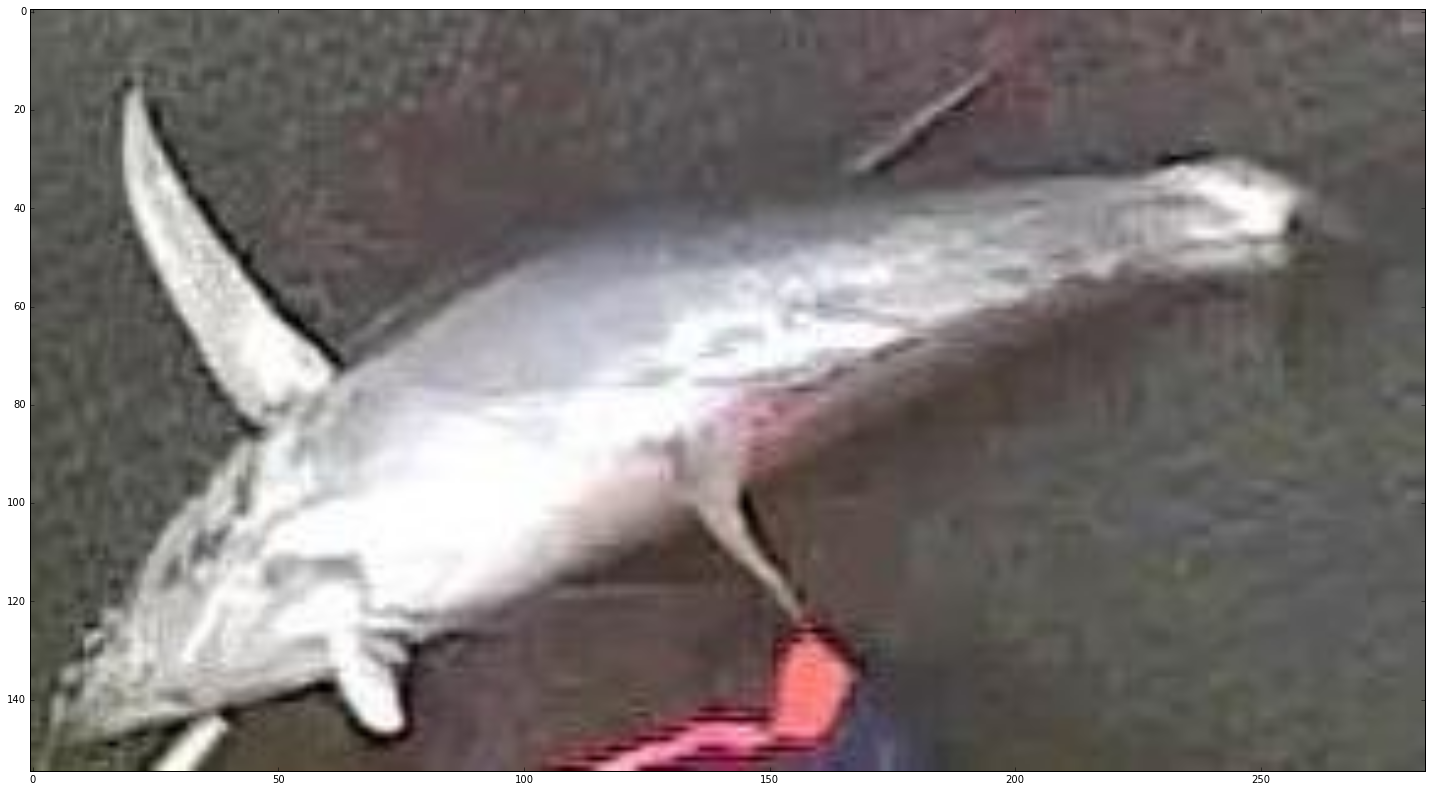

In [116]:
# files = glob('/a/data/fisheries_monitoring/data/classifiers/superbox/rotate/*/*.jpg')
# n = np.random.choice(len(files))
# one_file = files[n]
# print one_file
# img = np.array(imread(one_file))
# fig = plt.figure(figsize=(25, 25))
# plt.imshow(img)
# plt.show()